<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad4_PDI_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 4 Procesamiento Digital de Imagenes 2024
## Color

In [ ]:
# import de librerias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys

In [ ]:
def get_intensity(rgb_img):
  n,m = rgb_img.shape[1],rgb_img.shape[0]
  intensity_v = np.zeros((n,m))
  r_channel, g_channel, b_channel = cv2.split(rgb_img)
  matrices = np.array([r_channel, g_channel, b_channel])
  return np.mean(matrices, axis=0)

## Ejercicio 1:
Modelos de color y analisis

1. El archivo 'patron.tif’ corresponde a un patron de colores que varıan por columnas de rojo a azul. En este ejercicio se estudiara la informacion que contienen las componentes de los diferentes modelos de color:

  • Visualice el patron junto a las componentes [R, G, B] y [H, S, V]

  • Analice como varıa la imagen en funcion de los valores de sus planos de color. ¿Que informacion brinda cada canal?

  • Modifique las componentes H, S e V de la imagen para obtener un patron en RGB que cumpla con las siguientes condiciones

      – Variacion de matices de azul a rojo.

      – Saturacion y brillo maximos.
  
  • Vizualice la nueva imagen y sus componentes en ambos modelos. Analice y saque conclusiones.
  
2. Genere una funcion cuyo resultado sea una imagen donde los pixeles tengan los colores complementarios a los de la original. Utilice las componentes del modelo HSV y la imagen ‘rosas.jpg’.

3. Mejore la funcion para trazar los perfiles de intensidad que realizo en guıas previas, para que en la misma grafica

  • se visualicen simultaneamente los perfiles de cada canal: R, G y B.
  
  • se visualicen los perfiles de los canales H, S y V.

Text(0.5, 1.0, 'value')

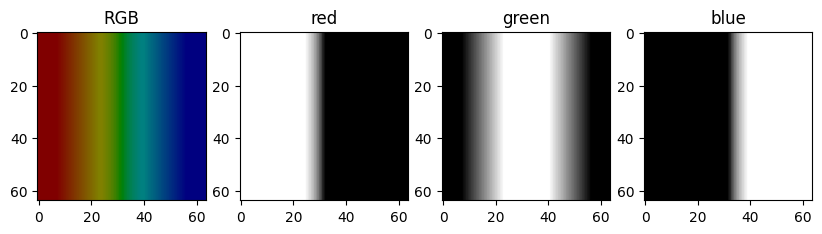

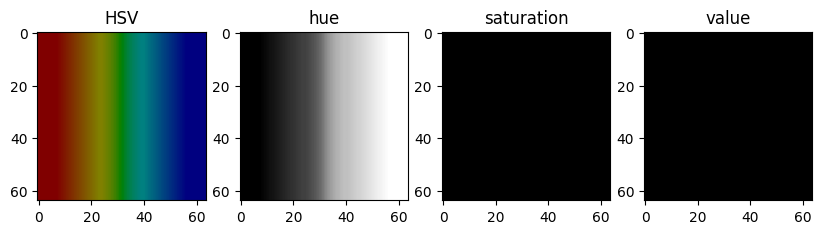

In [ ]:
# EJERCICIO 1.1
# use cv2.COLOR_BGR2RGB to read the patter as RGB
# img_patter_rgb = cv2.imread('patron.tif',cv2.COLOR_BGR2RGB)
img_patter = cv2.imread('patron.tif')
img_patter_rgb = cv2.cvtColor(img_patter, cv2.COLOR_BGR2RGB)
r_channel, g_channel, b_channel = cv2.split(img_patter_rgb)

fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(10,10))
ax[0].imshow(img_patter_rgb)
ax[0].set_title('RGB')
ax[1].imshow(r_channel,cmap='gray')
ax[1].set_title('red')
ax[2].imshow(g_channel,cmap='gray')
ax[2].set_title('green')
ax[3].imshow(b_channel,cmap='gray')
ax[3].set_title('blue')

# img_patter_hsv = cv2.imread('patron.tif', cv2.COLOR_BGR2HSV)
img_patter_hsv = cv2.cvtColor(img_patter, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(img_patter_hsv)

fig,ax2 = plt.subplots(nrows=1,ncols=4,figsize=(10,10))
ax2[0].imshow(img_patter_rgb)
ax2[0].set_title('HSV')
ax2[1].imshow(h_channel,cmap='gray')
ax2[1].set_title('hue')
ax2[2].imshow(s_channel,cmap='gray')
ax2[2].set_title('saturation')
ax2[3].imshow(v_channel,cmap='gray')
ax2[3].set_title('value')

In [ ]:
#red channel:high values are observed in areas
  #where there are pixels whith high red intensity
#green channel:high values are observed in areas
  #where there are pixess with high intensity
#blue channel:high valueas are observed in areas
  #where there are pixels with high intensity
#hue channel:the values for each tone are assigned according
  # their angule in the HSV cone. Reds belongs to highest values and blues to the lowest
#saturation channel: low values are observed because the
  #image color is not vribrant
#value channel: low values are observed because the image brightness es low

Text(0.5, 1.0, 'brigthnes and saturation max')

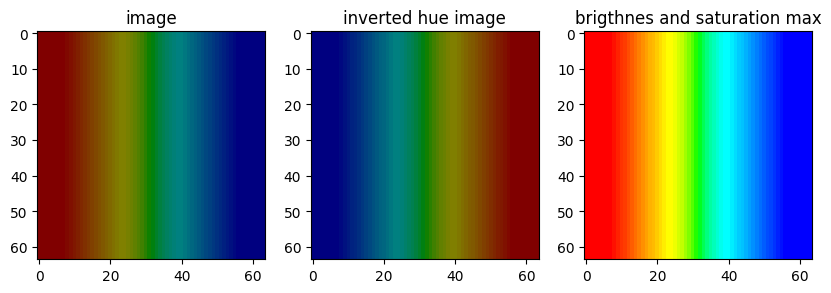

In [ ]:
# Modifique las componentes H, S e V de la imagen para obtener un patron en RGB que cumpla con las siguientes condiciones
img = cv2.imread('patron.tif')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(img_hsv)
#Variacion de matices de azul a rojo.
  #to reach this goal we must invert the hue channel of image
inverted_h_channel = cv2.flip(h_channel, 1) # one to horizontally invert the image
inverted_h_channel = cv2.flip(inverted_h_channel, 0) # zero to vertizally invert the image
img_inverted_hsv = cv2.merge((inverted_h_channel, s_channel, v_channel))
img_inverted_bgr = cv2.cvtColor(img_inverted_hsv, cv2.COLOR_HSV2BGR)
#Saturacion y brillo maximos
 #to reach these goals, we must convert all values of both channel,
  #saturation and value,to 255.
sv_max_hsv = cv2.merge((h_channel, np.full_like(s_channel, 255), np.full_like(v_channel, 255)))
sv_max_bgr = cv2.cvtColor(sv_max_hsv, cv2.COLOR_HSV2BGR)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
ax[0].imshow(img);ax[0].set_title('image')
ax[1].imshow(img_inverted_rgb);ax[1].set_title('inverted hue image')
ax[2].imshow(sv_max_rgb);ax[2].set_title('brigthnes and saturation max')

(321, 400, 3)


Text(0.5, 1.0, 'img_complement')

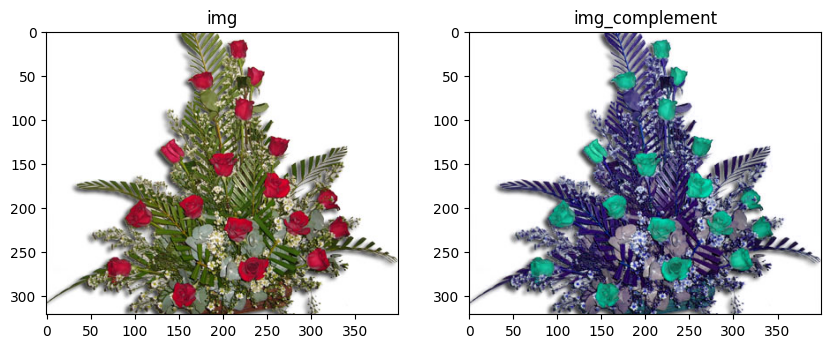

In [ ]:
# EJERCICIO 1.2
img = cv2.imread('rosas.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_complement_h = complement_hsv(img_hsv)
img_complement_bgr = cv2.cvtColor(img_complement_h, cv2.COLOR_HSV2BGR)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR));ax[0].set_title('img')
ax[1].imshow(img_complement_bgr);ax[1].set_title('img_complement')

In [ ]:
#imput hsv image / output hsv image with complementary hue
def complement_hsv(img):
  h_channel, s_channel, v_channel = cv2.split(img_hsv)
  print(h_channel[])
  #to find complemet color we can add 180º to original angule at hue channel.
   # taking into account that hue channel -> 0-180 where 180 -> 360º and 90 -> 180º
  complement_h_channel = (h_channel +90)%180
  img_complement_h = cv2.merge((complement_h_channel, s_channel, v_channel))
  return img_complement_h

In [ ]:
# EJERCICIO 1.3
def draw_image_component_arrays(img_url,y,x):
  img = cv2.imread(img_url)
  img_hsv =  cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  h_channel, s_channel, v_channel = cv2.split(img_hsv)
  img_bgr = cv2.cvtColor(src, cv2.COLOR_RGB2BGR)
  b_channel, g_channel, r_channel = cv2.split(img_bgr)
  y = np.array(yx[0])
  x = np.array(yx[1])
  fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
  ax[0].plot(h_channel[yx])
  #if row_or_colum = 0: # example -> (125,20:160)

In [ ]:
img = cv2.imread('rosas.jpg')
y = 300
x = (0,50,1)
draw_image_component_arrays(img,y,x)

AttributeError: module 'cv2' has no attribute 'COLOR_BGR2BGR'

## Ejercicio 2:
Procesamiento de imagenes en pseudocolor

1. Habitualmente las imagenes que se relevan en partes no visibles del espectro (como las de infrarrojos, radar, etc.) se encuentran en escala de grises. Para resaltar zonas de interes, se pueden asignar colores a rangos especıficos de intensidades. Para este ejercicio debe utilizar la imagen ‘rio.jpg’ y resaltar todas las areas con acumulaciones grandes de agua (rıo central, ramas mayores y pequeÑos lagos) en color amarillo. A continuacion le proponemos una guıa metodologica para resolver esto, aunque usted puede proponer otra:

  (a) analizar el histograma y estimar el rango de valores en el que se representa el agua,
  
  (b) generar una imagen color cuyos canales son copia de la imagen de intensidad,
  
  (c) recorrer la imagen original y asignar el color amarillo a los pıxeles cuyas intensidades estan dentro del rango definido,
  
  (d) visualizar la imagen resultante y ajustar el rango de grises de ser necesario. Consejo: esto se hace Mas simple utilizando trackbars.

In [ ]:
# EJERCICIO 2.a

In [ ]:
# EJERCICIO 2.b

In [ ]:
# EJERCICIO 2.c

In [ ]:
# EJERCICIO 2.d

## Ejercicio 3:

Procesamiento de imagenes en color

1. Manejo de histograma: la imagen ‘chairs oscura.jpg’ posee poca luminosidad. Usted debe mejorar la imagen a partir de la ecualizacion de histograma, comparando los efectos de realizarla en RGB (por planos), en HSV (canal V) y en HSI (canal I).

  • Visualice la imagen original ‘chairs.jpg’, comparela con las imagenes realzadas y discuta los resultados.
  
  • Repita el proceso para otras imagenes de bajo contraste (por ejemplo ‘flowers oscura.tif’) y analice los resultados.
  
2. Realce mediante acentuado: utilice la imagen‘camino.tif’ que se observa desenfocada. Usted debe mejorar la imagen aplicando un filtro pasa altos de suma 1. Compare los resultados de procesar la imagen en los modelos RGB, HSV y HSI.

In [ ]:
# EJERCICIO 3.1

In [ ]:
# EJERCICIO 3.2

## Ejercicio 4:
Segmentacion basada en color

Este proceso permite separar la imagen en regiones utilizando informacion del color. En este ejercicio usted debe implementar la segmentacion de imagenes para los modelos de color RGB y HSV. En cada caso debera determinar el subespacio a segmentar para generar una mascara, que luego utilizara para extraer solo la informacion de interes de la imagen original. En cuanto a la metodologıa, le proponemos que utilice la imagen ‘futbol.jpg’ y defina una ROI representativa del color a segmentar, luego • para el modelo RGB: use la informaci´on para calcular el centro de la esfera y su radio. Podrıa reemplazar la formula de la esfera por la de una elipsoide.

  • para el modelo HSV: Utilice las componentes H y S para determinar el subespacio rectangular a segmentar. Consejo: utilizar los histogramas puede ser una buena alternativa.
  
  • Compare, analice y saque conclusiones sobre los resultados de ambos Metodos.
  
  • Pruebe su implementacion con otras imagenes, por ejemplo segmentando solo la piel en las imAgenes s01 i08 H s06 i13 H LV.png, s08 i06 CM.png, s03 i10 H MA.png.
  
  Analice el desempeÑo de ambos metodos.
  
  ¿Que metodo le parece mejor? H DM.png, s05 i08 H LB.png,
  
  ¿Es posible obtener un conjunto de valores optimo para todas las imagenes?
  
  ¿Es suficiente aplicar la segmentacion sin metodos de pre-procesamiento (realce o filtrado)?
  
  ¿Donde cree usted que estan los mayores inconvenientes?
  
   ¿Que condiciones observa en la escena que son homogeneas y cuales heterogeneas? (distancia camara-objeto, foco, iluminacion ambiente, fondo de la escena, ubicacion y pose del sujeto, color de piel, vestimenta y accesorios, etc.)
   
   A partir de estos analisis, ¿Podrıa usted generar una lista de consideraciones utiles para generar una base de datos de imagenes?

In [ ]:
# EJERCICIO 4
img_futbol = cv2.imread('futbol.jpg')

# read the image in rgb and hsv
img_futbol_rgb = cv2.cvtColor(img_futbol,cv2.COLOR_RGB2BGR)
img_futbol_hsv = cv2.cvtColor(img_futbol,cv2.COLOR_RGB2HSV)

# for the rgb model: segmentation from a sphere region
#   if( np.sum( (pixel_value - center_sphere)**2 ) < radius) =>  Si = Ri
#   else   =>  Si = [0,0,0] -> black

# for the hsv model use a rectangle region
# into_hsv =cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
# L_limit=np.array([98,50,50]) # setting the blue lower limit
# U_limit=np.array([139,255,255]) # setting the blue upper limit
# b_mask=cv2.inRange(into_hsv,L_limit,U_limit)
# blue=cv2.bitwise_and(frame,frame,mask=b_mask)

In [ ]:
def generate_mask_sphere(center, radius, img):
  mask = np.zeros(img.shape)
  for i in np.arange(0, mask.shape[0]):
      for j in np.arange(0, mask.shape[1]):
          if np.sum((img[i,j] - center)**2) < radius**2:
              mask[i,j] = [255,255,255]
  return mask.astype(np.uint8)

In [ ]:
def generate_mask_rectangle(lower_limit, upper_limit,  img):
  # upper_limit = np.array([lower_limit[0]+rectangle,255,255]).astype(np.uint8)
  print('lower limit hue ',lower_limit[0])
  print('uper limit hue ',upper_limit[0])
  mask = cv2.inRange(img,lower_limit,upper_limit)
  return mask.astype(np.uint8)

In [ ]:
def segmentation_sphere_rgb(red,green,blue,radius,img):
  center_sphere_rgb = np.array([red,green,blue])
  # obtain the mask and segment of the image using the bitwise_and
  mask = generate_mask_sphere(center_sphere_rgb,radius,img)
  segment = cv2.bitwise_and(img,mask)
  # plot the original image and the segment obtain from the sphere mapping
  fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
  ax[0].imshow(img)
  ax[0].set_title('Imagen RGB')
  ax[1].imshow(mask,cmap='gray')
  ax[1].set_title('Mask')
  ax[2].imshow(segment)
  ax[2].set_title('Image Segment with sphere mapping')

In [325]:
def segmentation_rectangle_hsv(lower,upper,img):
  mask = generate_mask_rectangle(lower, upper, img)
  h_channel, s_channel, v_channel = cv2.split(img)
  segment = cv2.bitwise_and(h_channel,mask)
  img_segmented = cv2.merge((segment, s_channel, v_channel))
  img_segmented_bgr = cv2.cvtColor(img_segmented, cv2.COLOR_HSV2BGR)
  # plot the original image and the segment obtain from the sphere mapping
  fig,ax2 = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
  ax2[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2BGR))
  ax2[0].set_title('Imagen HSV')
  ax2[1].imshow(mask,cmap='gray')
  ax2[1].set_title('Mask')
  ax2[2].imshow(img_segmented_bgr)
  ax2[2].set_title('Image Segment with rectangle mapping')

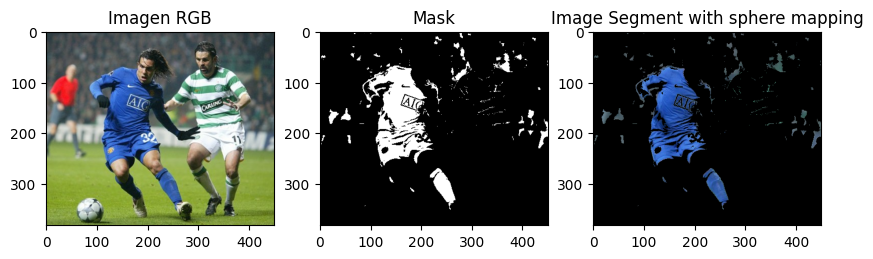

In [326]:
# the rgb mapping -> define the color of the center of the sphere and the radius
r_value = 26; g_value = 78; b_value = 179
radius_rgb = 100
segmentation_sphere_rgb(r_value,g_value,b_value,radius_rgb,img_futbol_rgb)

lower limit hue  10
uper limit hue  15


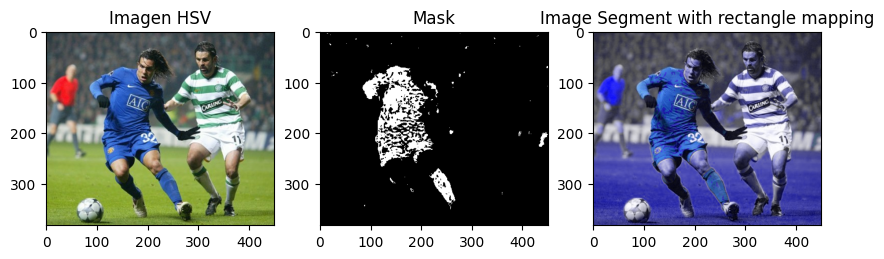

In [327]:
# the hsv mapping define the limit of the limit and the radius of the rectangle
lower_limit = np.array([img_futbol_hsv[150,150,0],50,50]).astype(np.uint8)
 # setting the lower limit
rec = 5
u_limit = np.array([lower_limit[0]+rec,255,255]).astype(np.uint8)

segmentation_rectangle_hsv(lower_limit,u_limit,img_futbol_hsv)

## Ejercicio 5:

Trabajos de aplicacion

1. Realice una aplicacIon que le permita cargar y visualizar una imagen y el resultado de la segmentacion, simultaneamente. Los rangos (superior e inferior) de los canales seran seteados mediantes tracksbars. Utilice un componente tipo check-box o una tecla para mostrar la mascara o la segmentacion, alternativamente.

  • Implemente una versIon que le permita obtener la segmentacion de una imagen, utilizando [R,G,B].
  
  • Implemente una version que le permita obtener la segmentacion de una imagen, utilizando [H,S,V].
  
  • Implemente una version que le permita obtener la segmentacion de un video, utilizando [H,S,V], on the fly.
  
  • Implemente una version que le permita obtener la segmentacion de la captura de la webcam, utilizando [H,S,V].
  
2. El gobierno de la provincia de Misiones lo ha contratado para realizar una aplicacion que sea capaz de detectar zonas deforestadas. Para desarrollar un primer prototipo le han suministrado una imagen satelital (Deforestacion.png) en la que un experto ya delimito el area donde deberıa existir monte nativo y sobre la cual usted debe trabajar. Se requiere que su aplicacion:

  • Segmente y resalte en algun tono de rojo el area deforestada.
  
  • Calcule el area total (hectareas) de la zona delimitada, el area de la zona que tiene monte y el area de la zona deforestada.
  
  • (Opcional) Detecte automaticamente la delimitacion de la zona.
  
  Ayuda:
  • Explore todos los canales de los diferentes modelos de color para determinar cual (o que combinacion de ellos) le proporciona mas informacion.
  • Como su objetivo es la segmentacion de las distintas zonas, piense que herramienta (de las que ya conoce) le permitirıa lograr zonas mas homogeneas.
  • Utilice la referencia de la esquina inferior izquierda para computar los tamaÑos de las regiones.

In [ ]:
# EJERCICIO 5.1

In [382]:
# EJERCICIO 5.2
img_deforestacion = cv2.imread('Deforestacion.png')


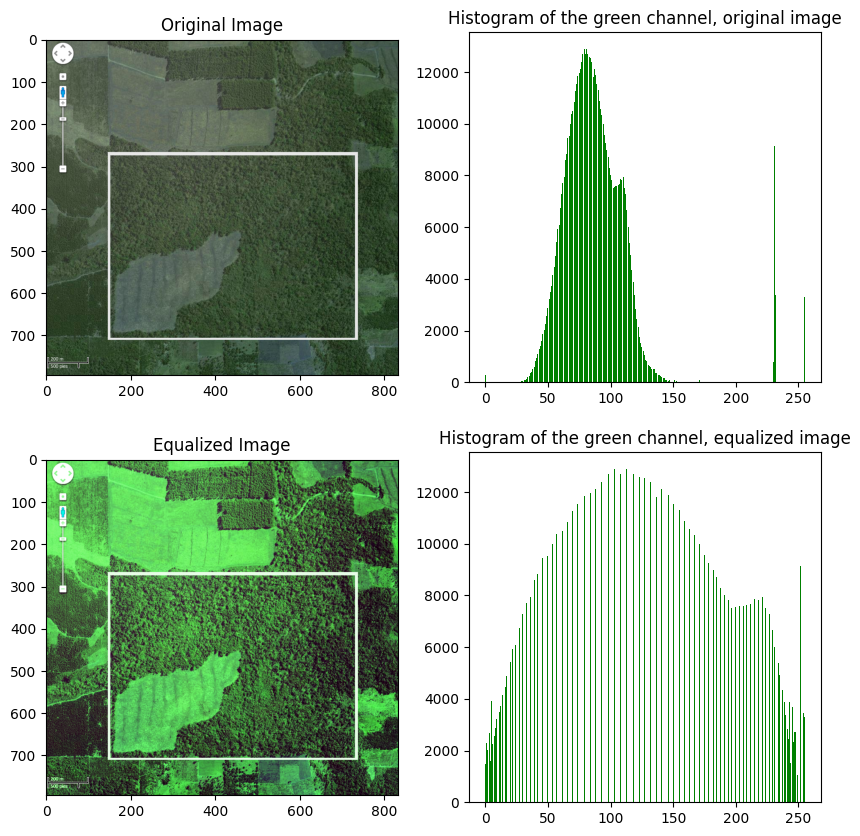

In [384]:
# keep the bgr model
b_channel, g_channel, r_channel = cv2.split(img_deforestacion)
hist1 = cv2.calcHist([img_deforestacion],[1],None,[256],[0,256]).astype(int)
hist1 = [elemento for sublist in hist1 for elemento in sublist]

g_channel_equ = cv2.equalizeHist(g_channel)
img_def_equ = cv2.merge((b_channel, g_channel_equ, r_channel))
hist2 = cv2.calcHist([img_def_equ],[1],None,[256],[0,256]).astype(int)
hist2 = [elemento for sublist in hist2 for elemento in sublist]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax[0,0].imshow(img_deforestacion)
ax[0,0].set_title('Original Image')
ax[0,1].bar(x=np.arange(0,256),height=hist1,color='green')
ax[0,1].set_title('Histogram of the green channel, original image')
ax[1,0].imshow(img_def_equ)
ax[1,0].set_title('Equalized Image')
ax[1,1].bar(x=np.arange(0,256),height=hist2,color='green')
ax[1,1].set_title('Histogram of the green channel, equalized image')
plt.show()

lower limit hue  50
uper limit hue  64


Text(0.5, 1.0, 'deforested zones highlight')

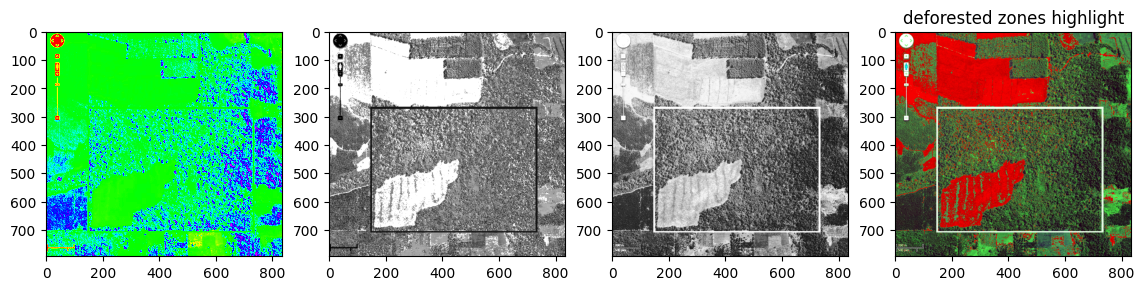

In [503]:
# use the hsv model
img_hsv = cv2.cvtColor(img_def_equ,cv2.COLOR_BGR2HSV)

# using the hsv model and making a segmentation based on hue and saturation channel
# the lower and upper values distinguish the green tones, and the saturation the lightest zones of the images
low = np.array([50,130,180])
upp = np.array([64,160,255])

mask = generate_mask_rectangle(low, upp, img_hsv)
h_channel, s_channel, v_channel = cv2.split(img_hsv)
segment = h_channel.copy()
for i in np.arange(0,mask.shape[0]):
  for j in np.arange(0,mask.shape[1]):
    if mask[i,j] == 255:
      segment[i,j] = 120  # the model is bgr so the red is near to 140
      s_channel[i,j] = 255

img_segmented = cv2.merge((segment, s_channel, v_channel))
img_segmented = cv2.cvtColor(img_segmented, cv2.COLOR_HSV2BGR)

fig,ax2 = plt.subplots(nrows=1,ncols=4,figsize=(14,14))
ax2[0].imshow(h_channel,cmap='hsv')
ax2[1].imshow(s_channel,cmap='gray')
ax2[2].imshow(v_channel,cmap='gray')
ax2[3].imshow(img_segmented)
ax2[3].set_title('deforested zones highlight')

In [507]:
# calculate the area in hectares (100x100 meters)
# the image show a guide of 200 meters -> so, we'll follow this rule: 100 pixels is equal to 200m
# then 50px == 100m, 250px == 10000m
img_copy = img_segmented.copy()
img_copy_hsv = cv2.cvtColor(img_copy, cv2.COLOR_BGR2HSV)

h_channel, s_channel, v_channel = cv2.split(img_copy_hsv)

# the area of the rectangle
# to get the number of pixels in the highlight square start in a position relative close of the square,
# the iterate in the value channel and get the last point with value > 250
# with this two points can obtain the number of pixels of width and height of the square
# with the total number of pixel inside the square, use the rule explain after to get the number of hectares
start = [200,120]
points = []
last = [0,0]
for i in np.arange(start[0],img_copy.shape[0]):
  for j in np.arange(start[1],img_copy.shape[1]):
    if v_channel[i,j] > 250:
      last = [i,j]
      if len(points) == 0:
        points.append([i,j])
points.append(last)
# cv2.rectangle(v_channel, (points[0][1],points[0][0]), (points[1][1],points[1][0]), color=(255, 0, 0) , thickness=10)
print('initial point: ',points[0])
print('last point: ',points[1])
number_pixels_square = (points[1][0] - points[0][0])*(points[1][1] - points[0][1])
print('total of pixels of the highlight square: ',number_pixels_square)
print('square meters of the highlight square: ',number_pixels_square*2)
print('numbers of hectares of the highlight square: ',number_pixels_square*2/10000)
print('------------------------')
# the area of the deforested zones
# to get the number of pixels of the deforested zones we loop every pixel of the segmented image in hsv model
# and add one if the hue of the pixel is equal to 120
number_pixel_deforested = np.count_nonzero(h_channel == 120)
print('number (aproximated) of pixels in deforested zones ',number_pixel_deforested)
print('square meters of deforested zones: ',number_pixel_deforested*2)
print('numbers of hectares of deforested zone: ',number_pixel_deforested*2/10000)
print('------------------------')
# the area of the forest zones
# if we considerated the pixels in the images what doesn't belong to the deforested zones like forested pixel
# using the total of the images less the deforested zones we obtain the forest zones
number_pixel_forest = (img_copy.shape[0]*img_copy.shape[1])-number_pixel_deforested
print('number of pixel forest zones: ',number_pixel_forest)
print('square meters of forest zones: ',number_pixel_forest*2)
print('numbers of hectares forest zone: ',number_pixel_forest*2/10000)


initial point:  [267, 146]
last point:  [710, 736]
total of pixels of the highlight square:  261370
square meters of the highlight square:  522740
numbers of hectares of the highlight square:  52.274
------------------------
number (aproximated) of pixels in deforested zones  170066
square meters of deforested zones:  340132
numbers of hectares of deforested zone:  34.0132
------------------------
number of pixel forest zones:  492130
square meters of forest zones:  984260
numbers of hectares forest zone:  98.426
